# Assignment 1: Simulating Ecological Homeostasis

## Installation

If the math equations are not rendering nicely below, you may need to install `nbconvert`. 

On some systems this can be done by executing `pip3 --user --upgrade nbconvert`

## Background: The Gaia Hypothesis & Daisy World
In the 1970s, James Lovelock and Lynn Margulis developed the *Gaia Hypothesis*. This is a highly controversial theory which proposes that the global ‘biosphere’ is self-regulating—that ecosystems work to maintain the conditions necessary life to persist on Earth. As a case in point to support his theory, Lovelock observed that the amount of heat arriving from our Sun has increased significantly since the origin of life, but that the temperature of the planet has remained within the limits of hability throughout. How does this homeostasis (loosely translatable as ‘keeping things the same’) occur?

Lovelock argues that the homeostasis is a natural biproduct of complex ecosystems, but this is a very controversial claim, because it seems to contradict classic ideas of evolution being driven by selfish competition and ‘survival of the fittest.’ Lovelock’s theory suggests that instead of competing and ‘being selfish,’ diverse species come to some sort of agreement, whereby they’ll cooperate to make conditions beneficial for all life (and not just themselves). If you are interested to know more, the wikipedia page on the ‘Gaia Hypothesis’ provides some more information including links to further reading.

Debate concerning the Gaia Hypothesis continues today. A computational model known as ‘Daisy World’ has been developed to show how regulation of environmental conditions (such as the temperature of the planet) can happen. The model considers a planet populated by two different types of daisies, black ones and white ones. The black daisies increase the temperature (by a small amount) by absorbing sunlight, and the white ones reflect light back into space, decreasing the local temperature. In this assignment, we will develop a simplified version of Daisy World that only includes the white daisies.

As is common in developing computational models, we will make many simplifying assumptions. We will assume:

1. the daisies grow better at certain temperatures than others;

2. the temperature of the planet is the same everywhere;

3. daisies are the only relevant species that lives on the planet;

4. the carrying capacity (i. e. the number of daisies that are alive at equilibrium) is well approximated as a function of temperature;

5. when there are no daisies around, it is still possible for a population to grow (we can imagine there are always seeds in the ground).

## Model

Our model will be a continuous-time dynamical system that is described by three differential equations. Each equation describes the dynamics of one of the following variables.

* $n$ - the normalized population density of daises. 1 means the planet is covered in the maximum possible density of daises and 0 means there are no daisies at all, etc.

* $y$ - the temperature of the planet (this corresponds in our simplified model to the temperature everywhere)

* $p$ - an external ‘perturbing’ force to the temperature. This can be conceived of as a change in the radiation from the star that the planet is orbiting, or any other (combination) of factors that are modifying the planet’s temperature other than the presence of the daisies.

In this assignment, as you follow the instructions, you will build a computational model of this system. By the end of it hopefully you will have gained some insight into one way that biological feedback can (at least in theory) stabilise environments as claimed by Lovelock and Margulis.

### Step 1: Write a function that maps the temperature to the carrying capacity of the daisies.

In our equations, the *carrying capacity* is written $k$. It describes the equilibrium population density, i. e. what the population density (n) would move toward if everything else were held constant. Assumption 4 tells us that we can $k$ is well approximated as some function of temperature ($y$):

$$ k = f(y) $$

We will use a Gaussian function to approximate what the carrying capacity is for a given temperature:

$$ k = f(y) = a \cdot \exp \left ( -\frac{(y-b)^2}{2c^2} \right) $$

In this equation, there are three parameters ($a$, $b$ and $c$). $a$ specifies the height of the curve’s peak; $b$ specifies the position of the maximum; and $c$ specifies the standard deviation, i. e. the ‘width’ of the curve.

What values for these parameters should we use? $k$ is normalized, so the peak of the curve should be 1. Let us assume that the daisies grow best at a temperature of $25^o$ C. and that the standard deviation is 3.

**Q1a. (0.5 marks)** Write a Python function that takes y as an argument and returns k.

In [5]:
## Q1a answer goes here...define the following function
import numpy as np
def carrying_capacity(y) :
    a = 1
    b = 25
    c = 3
    inside_ex = -((y-b)**2)/(2*(c**2))
    k = a * np.exp(inside_ex)
    return k


**Q1b. (0.5 marks)** To confirm that your function is correct, plot it for suitable values of y. The numpy function `numpy.arange` may be useful for generating an array of y-values. (Or you can use a Python list comprehension).

FOR ALL PLOTS LABEL AXES AND PROVIDE TITLES OR POINTS WILL BE LOST!

Text(0.5, 1.0, 'Carrying Capacity of Daisies for Temperature')

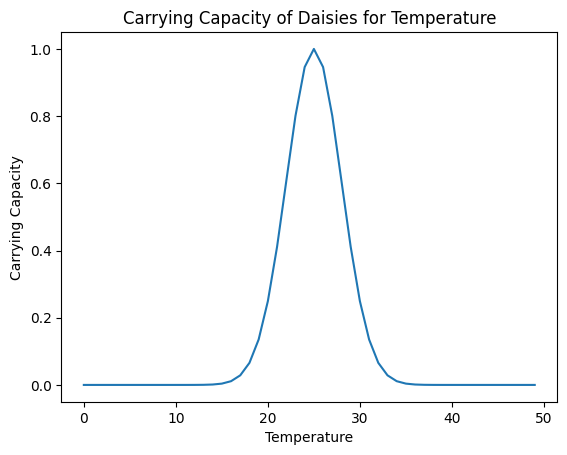

In [6]:
## Q1b answer goes here...
import matplotlib.pyplot as mp
capacity = [carrying_capacity(y) for y in range(50)]
mp.plot(capacity)
mp.xlabel("Temperature")
mp.ylabel("Carrying Capacity")
mp.title("Carrying Capacity of Daisies for Temperature")

### Step 2: Describing how daisy density changes over time.

In our model, the population density ($n$) changes as a function of the current population density ($n$) and the current carrying capacity ($k$):

$$ \frac{dn}{dt} = g(n,k) $$

We shall model $n$ as always approaching the carrying capacity, with a rate of this approach that is linearly proportional to the difference between the current population density and the carrying capacity. The scale of the response (i. e., the slope of the line), $s = 0.5$.

**Q2a. (0.5 marks)** Write down (in math notation, not code) the differential equation that captures what has just been described above. If it is not clear to you how to do this, think about what a graph of this function should
look like. Use pencil and paper to think this through.

Double click on the word ANSWER below, to edit the markdown. Your answer here should sit between the two sets of dollar-signs to be displayed as latex math. When you've written an equation, to see it rendered as math, run the cell (I hit control-enter to do so).

The basics of latex math in markdown can be found here: https://www.latex-tutorial.com/tutorials/amsmath/



$$ \frac{dn}{dt} = g(n,k) = k-n $$

**Q2b. (0.25 marks)** Translate the above mathematical equation into a Python function that takes two
arguments (n and k) and returns the rate at which n changes. In other words, fill in the
following blank.

In [9]:
## Q2b answer goes here...
def dndt(n,k):
    return k-n

**Q2c. (0.25 marks)** To confirm that your function is working how it should be, plot $g (n,k)$ for an appropriate range of values of n, with k = 0.5.



Text(0.5, 1.0, 'Change in Population Density Based on Carrying Capacity')

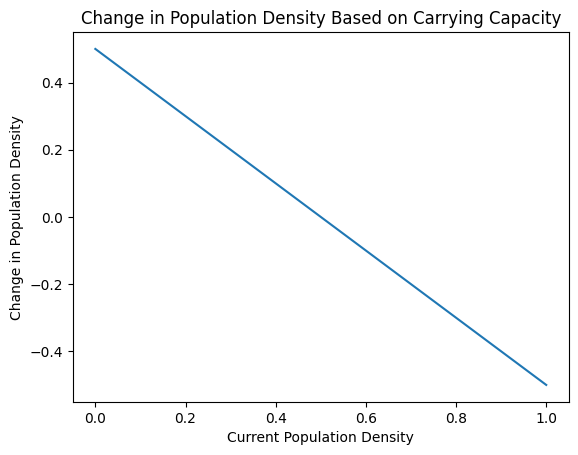

In [11]:
## Q2c answer goes here...
import numpy as np
import matplotlib.pyplot as mp
current_dens = np.linspace(0, 1, 10)
change_in_pop = []
for i in current_dens:
    change_in_pop.append(dndt(i, 0.5))
mp.plot(current_dens, change_in_pop)
mp.xlabel("Current Population Density")
mp.ylabel("Change in Population Density")
mp.title("Change in Population Density Based on Carrying Capacity")

**Q2d. (0.5 marks)** Super-impose on the same plot g ( n, k ) when k is fixed to one or two other values
(you pick the values).

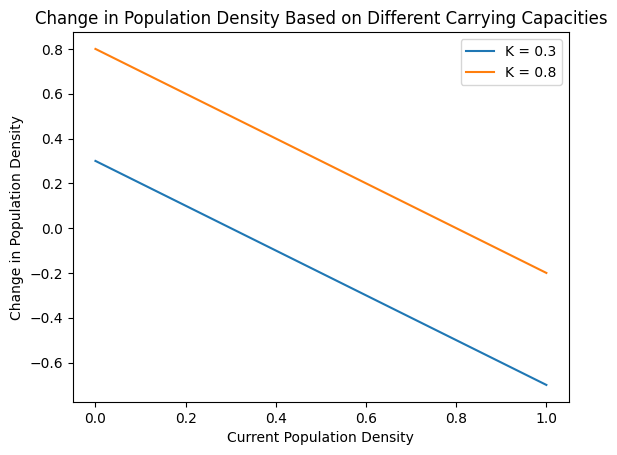

In [17]:
## Q2d answer goes here...
import numpy as np
import matplotlib.pyplot as mp
current_dens1 = np.linspace(0, 1, 10)
change_in_pop1 = []
for i in current_dens1:
    change_in_pop1.append(dndt(i, 0.3))
mp.plot(current_dens1, change_in_pop1)

current_dens2 = np.linspace(0, 1, 10)
change_in_pop2 = []
for i in current_dens2:
    change_in_pop2.append(dndt(i, 0.8))
mp.plot(current_dens2, change_in_pop2)
mp.xlabel("Current Population Density")
mp.ylabel("Change in Population Density")
mp.title("Change in Population Density Based on Different Carrying Capacities")
mp.legend(["K = 0.3", "K = 0.8"])

**Q2e. (0.5 marks)** In a sentence or two, describe why the above plots confirm that this function is working correctly. DON’T FORGET TO LABEL YOUR PLOTS.

When the population density is above the carrying capacity, the population would decline. This is shown in the plots above, as when the populations reach the carrying capacity in the x-axis, they start declining in density.

### Step 3: Describing how temperature changes over time.

The temperature changes at a rate proportional to the sum of (1) the influence of every-thing *other than* the daisies, which is captured by the variable $p$, and (2) the influence of the daisies. The influence of the daisies will be linearly proportional to their density, giving us the following differential equation,

$$ \frac{dy}{dt} = p + rn $$

where $r$ is a constant that describes the amount of influence that the daisies have. We’ll assign this parameter a value of $r = -10$, which can be interpreted as saying that when the daisies are at their maximum possible density, they bring the global temperature down by 10 degrees.

**Q3. (0.25 marks)** Translate the above Equation into a Python function as you did with the differential equation for $n$.

In [19]:
## Q3 answer goes here...
def dydt(p, n):
    return p + (-10 * n)

### Step 4: Non-daisy influence

Let us imagine that the radiation of the sun is increasing at an increasing rate. This can be described using the following differential equation, where $q = 0.02$ is a constant representing the rate of that increase and $t$ represents the amount of time that has passed since the start of the simulation.

$$ \frac{dp}{dt} = h(t) = qt $$

**Q4. (0.25 marks)** Translate this differential Equation into a Python function as you have done with the differential equations for $n$ and $y$.



In [21]:
## Q4 answer goes here...
def dpdt(t):
    return 0.02 * t

At this point you should have four Python functions:

 
    def carrying_capacity(...):
        """returns carrying capacity"""
        ...

    def dndt(...):
        """returns rate of change of population density """
        ...

    def dydt(...):
        """returns rate of temperature change"""
        ...

    def dpdt(...):
        """returns rate of change of non-daisy infl. upon temperature"""
        ....
        
**Q5. (2 marks)** Write a trajectory function that uses these functions to simulate a trajectory from the initial condition that is passed in as an argument. 

Your function should use the Euler integration we have learned about in class, and must NOT use an existing library (e.g. scipy) to solve the integration. The functions signature should look like this, where the final argument (‘dur’) indicates the duration of the trajectory to simulate.

    def trajectory(init_n, init_y, init_p, dur) :
    ...
    return ns, ys, ps, times
    
    
Tips:

* Experiment to pick an appropriate time step value.

* Be careful to pass time (and not the time step or the iteration count) to dpdt().

* Make your code as clear and understandable as you can to improve chances of getting partial credit.
    

In [46]:
## Complete this to answer Q5
DT = 0.15
def trajectory(init_n, init_y, init_p, dur):
    ns = [init_n]
    ys = [init_y]
    ps = [init_p]
    times = [0.0]
    i = 0.0
    while i < dur:
        k = carrying_capacity(ys[-1])
        ns.append(ns[-1] + DT * dndt(ns[-1], k))
        ys.append(ys[-1] + DT * dydt(ps[-1], ns[-1]))
        ps.append(ps[-1] + DT * dpdt(i))
        i += DT
        times.append(i)
    return ns, ys, ps, times

### Step 6: Plotting results and interpretation
Simulate a trajectory that starts with $n_0 = y_0 = p_0 = 0$ and that runs for 45 time units.

**Q6a. (0.25 marks)** On a labelled figure, plot a time-series that shows how the population density
changes over the course of the simulation.

Text(0.5, 1.0, 'Change in Population Density over Time, n=0, y=0, p=0')

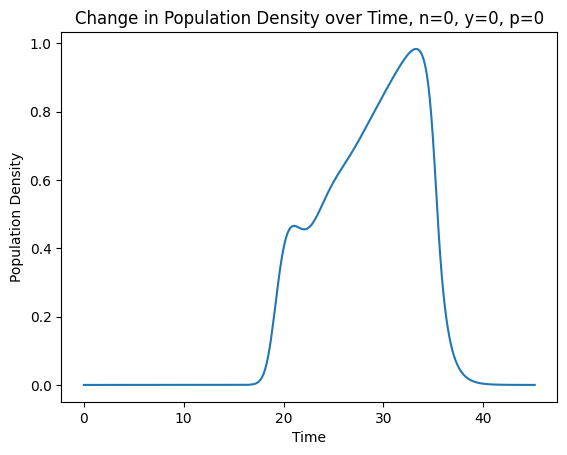

In [53]:
import matplotlib.pyplot as mp
traj = trajectory(0, 0, 0, 45)
mp.plot(traj[3], traj[0])
mp.xlabel("Time")
mp.ylabel("Population Density")
mp.title("Change in Population Density over Time, n=0, y=0, p=0")

**Q6b. (0.25 marks)** On a separate labelled figure, plot a time-series that shows how the temperature
changes over the course of the simulation.

Text(0.5, 1.0, 'Change in Temperature over Time, n=0, y=0, p=0')

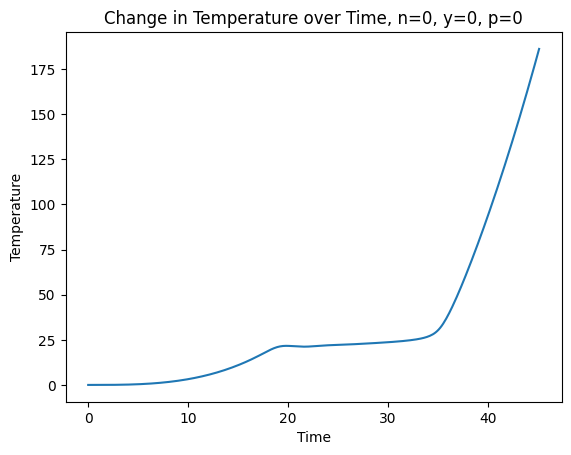

In [54]:
import matplotlib.pyplot as mp
traj = trajectory(0, 0, 0, 45)
mp.plot(traj[3], traj[1])
mp.xlabel("Time")
mp.ylabel("Temperature")
mp.title("Change in Temperature over Time, n=0, y=0, p=0")

**Q6c. (0.5 marks)** Create a new figure that replots what you plotted in Q6b, but also superimposes on top of that same plot a time-series that shows how the temperature would have changed if the daisies had no influence upon temperature. Label which line is which using a legend.

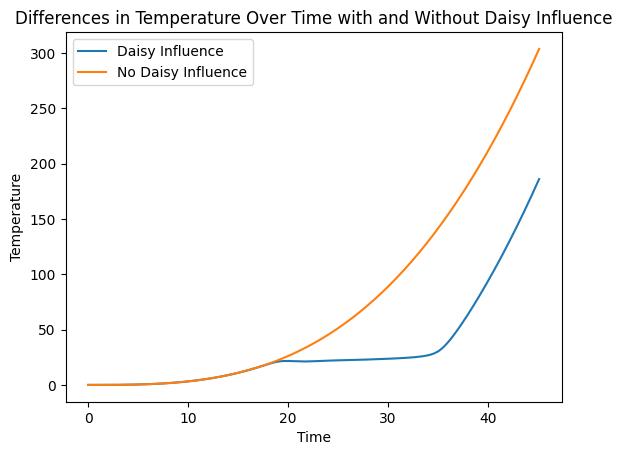

In [57]:
import matplotlib.pyplot as mp
traj = trajectory(0, 0, 0, 45)
DT = 0.15
def no_daisy_temp(p):
    return p
def traj_no_daisies(init_n, init_y, init_p, dur):
    ns = [init_n]
    ys = [init_y]
    ps = [init_p]
    times = [0.0]
    i = 0.0
    while i < dur:
        k = carrying_capacity(ys[-1])
        ns.append(ns[-1] + DT * dndt(ns[-1], k))
        ys.append(ys[-1] + DT * no_daisy_temp(ps[-1]))
        ps.append(ps[-1] + DT * dpdt(i))
        i += DT
        times.append(i)
    return ns, ys, ps, times
no_d = traj_no_daisies(0, 0, 0, 45)
mp.plot(traj[3], traj[1])
mp.plot(no_d[3], no_d[1])
mp.xlabel("Time")
mp.ylabel("Temperature")
mp.title("Differences in Temperature Over Time with and Without Daisy Influence")
mp.legend(["Daisy Influence", "No Daisy Influence"])

**Q7. (1 mark)** Interpret the results. What has happened? What are the striking features about the trajectories? What affects them? What conclusion(s) can we draw from the simulation? Write a short paragraph summarizing your interpretation.

The non-daisy influenced temperature is a smoother curve, while the daisy influenced tempeartures becomes a near flat line once it reaches around 20-25 degrees Celsius. This is because the daisies have an influence on temperature, as when the daisies reach their highest density, they reduce the temperature of the world by 10 degrees Celsius. Once the daisies reduce in number, the temperature is able to raise at a similar rate to the non-daisy influenced temperatures. They both raise at a similar rate until around 20 degrees. In conclusion, we are able to see how the daisies influence temperature on the world.

# Additional plots
If you have additional plots you'd like to refer to in your answer above, please include them below here and label them so that it is easy to see in your answer(s) above which figure(s) you are referring to.

In [2]:
## code for generating additional plots goes here...